In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing necessary libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from textblob import TextBlob
from tqdm import tqdm_notebook as tqdm
from textblob import TextBlob
import sys
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.preprocessing import MinMaxScaler
from numpy import *
from sklearn.metrics.pairwise import pairwise_distances
import joblib
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
# read data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample30.csv')
df.tail()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
29995,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T00:00:00.000Z,False,True,5,I got this conditioner with Influenster to try...,Softness!!,NaN,NaN,laurasnchz,Positive
29996,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-27T00:00:00.000Z,False,True,5,"I love it , I received this for review purpose...",I love it,NaN,NaN,scarlepadilla,Positive
29997,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,False,True,5,First of all I love the smell of this product....,Hair is so smooth after use,NaN,NaN,liviasuexo,Positive
29998,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-11T00:00:00.000Z,False,True,5,I received this through Influenster and will n...,Perfect for my oily hair!,NaN,NaN,ktreed95,Positive
29999,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-19T00:00:00.000Z,False,True,5,I received this product complimentary from inf...,Conditioned into healthy,NaN,NaN,kcoopxoxo,Positive


In [4]:
# number of rows and columns
df.shape

(30000, 15)

In [5]:
# number of null values in each column
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [6]:
# data type of each column
df.dtypes

id                      object
brand                   object
categories              object
manufacturer            object
name                    object
reviews_date            object
reviews_didPurchase     object
reviews_doRecommend     object
reviews_rating           int64
reviews_text            object
reviews_title           object
reviews_userCity        object
reviews_userProvince    object
reviews_username        object
user_sentiment          object
dtype: object

## 2.Exploratory Data Analysis

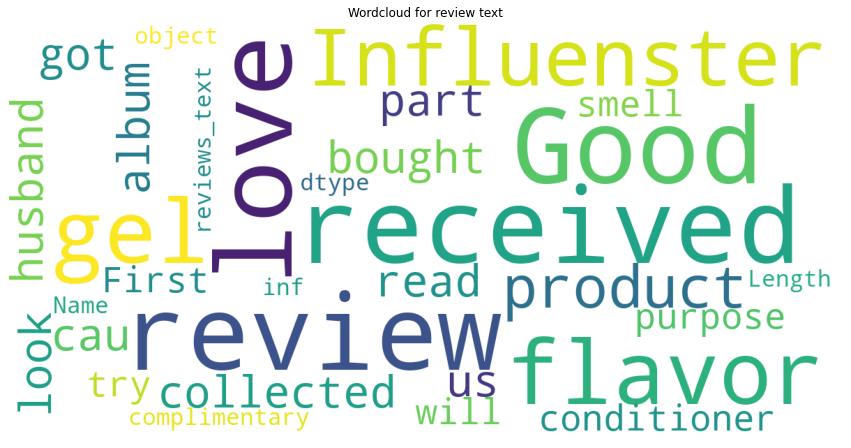

In [7]:
# Wordcloud for review text

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=50, 
        scale=3,
        random_state=2
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.title('Wordcloud for review text')
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['reviews_text'])


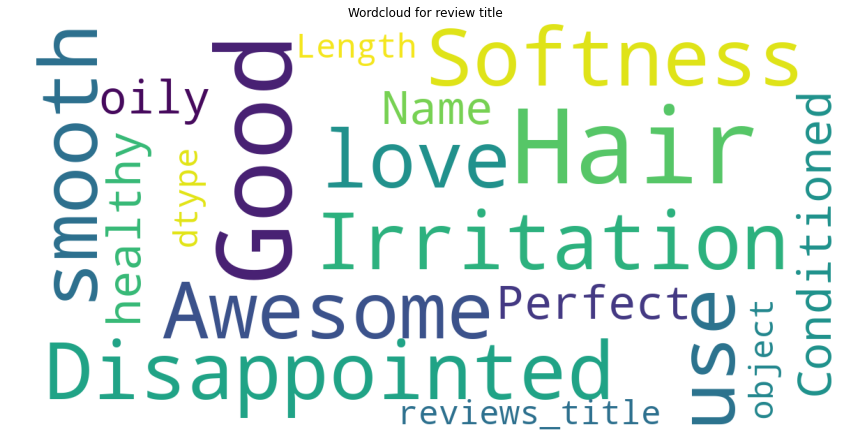

In [8]:
# Wordcloud for review title
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=50, 
        scale=3,
        random_state=2
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.title('Wordcloud for review title')
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['reviews_title'])


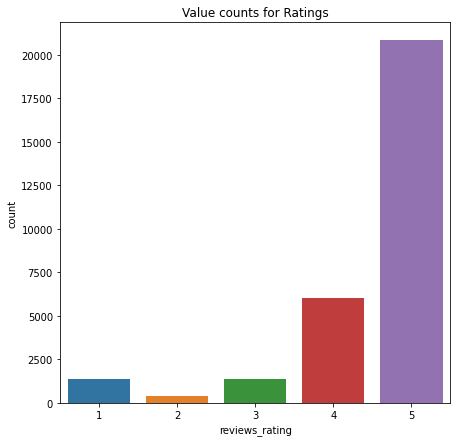

In [9]:
# value counts of ratings
plt.figure(figsize=(7,7))
plt.title('Value counts for Ratings')
sns.countplot(x='reviews_rating',data=df)
plt.show()

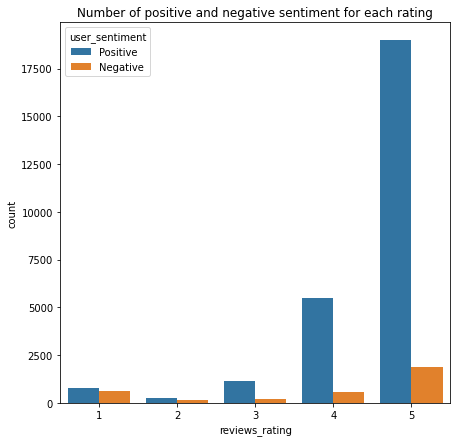

In [10]:
# Number of positive and negative sentiment for each rating
plt.figure(figsize=(7,7))
plt.title('Number of positive and negative sentiment for each rating')
sns.countplot(x='reviews_rating',data=df, hue='user_sentiment')
plt.show()

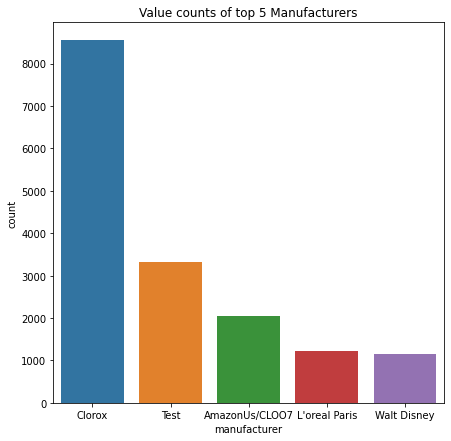

In [11]:
# value counts of top 5 maufacturers
plt.figure(figsize=(7,7))
plt.title('Value counts of top 5 Manufacturers')
sns.countplot(x='manufacturer',data=df, order=df['manufacturer'].value_counts().iloc[:5].index)
plt.show()

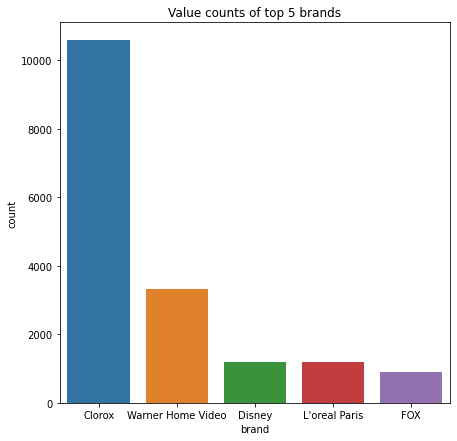

In [12]:
# value counts of top 5 brands
plt.figure(figsize=(7,7))
plt.title('Value counts of top 5 brands')
sns.countplot(x='brand',data=df, order=df['brand'].value_counts().iloc[:5].index)
plt.show()

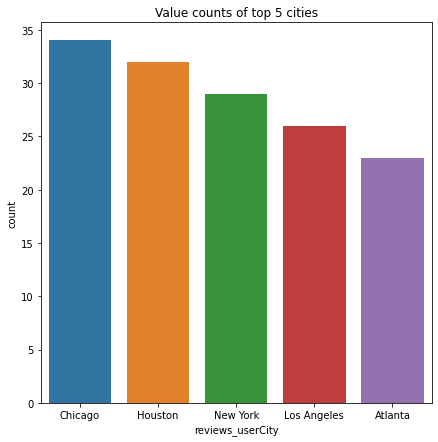

In [13]:
# value counts of top 5 cities
plt.figure(figsize=(7,7))
plt.title('Value counts of top 5 cities')
sns.countplot(x='reviews_userCity',data=df, order=df['reviews_userCity'].value_counts().iloc[:5].index)
plt.show()

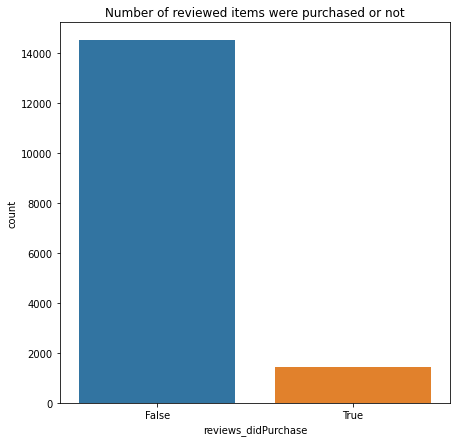

In [14]:
# Number of reviewed items were purchased or not
plt.figure(figsize=(7,7))
plt.title('Number of reviewed items were purchased or not')
sns.countplot(x='reviews_didPurchase',data=df)
plt.show()

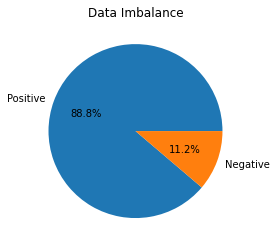

In [15]:
# Data imbalance
x=df['user_sentiment'].value_counts()
fig1, ax1 = plt.subplots()
plt.title('Data Imbalance')
ax1.pie(x,labels=['Positive','Negative'], autopct='%1.1f%%')
plt.show()

## 3. Data Cleaning

In [16]:
#function - removing the stopwords
def remove_stopwords(text, is_lower_case=False):
  tokenizer=ToktokTokenizer()
  stopword_list=set(nltk.corpus.stopwords.words('english'))
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  if is_lower_case:
    filtered_tokens = [token for token in tokens if token not in stopword_list]
  else:
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
  filtered_text = ' '.join(filtered_tokens)    
  return filtered_text

In [17]:
#function - Stemming the text
def simple_stemmer(text):
  ps=PorterStemmer()
  text= ' '.join([ps.stem(word) for word in text.split()])
  return text

In [18]:
def clean(sent_df, keep_name=False):
  if keep_name==True:
    sent_df = sent_df[['name','reviews_text','reviews_title','user_sentiment']]
    col=['name','reviews_text_title','user_sentiment']
  elif keep_name==False:
    sent_df = sent_df[['reviews_text','reviews_title','user_sentiment']]
    col=['reviews_text_title','user_sentiment']

  # Dropping the row which has null in user_sentiment
  sent_df = sent_df.dropna(subset=['user_sentiment'])

  # concatenate review text and title
  sent_df = sent_df.replace(np.nan, '', regex=True)
  sent_df['reviews_text_title']= sent_df['reviews_text'].str.cat(sent_df['reviews_title'],sep=" ")
  sent_df=sent_df.reset_index(drop=True)

  # drop review text and review title columns
  sent_df.drop(['reviews_title','reviews_text'], axis='columns', inplace=True)
  sent_df=sent_df.loc[:,col]

  ## Lowercase
  sent_df['reviews_text_title'] = sent_df['reviews_text_title'].str.lower()
  
  # remove special characters
  sent_df["reviews_text_title"] = sent_df["reviews_text_title"].str.replace('[^\w\s]','')

  # removing stop words
  stopword_list=set(nltk.corpus.stopwords.words('english'))
  sent_df['reviews_text_title']=sent_df['reviews_text_title'].apply(remove_stopwords)

  #stemming
  sent_df['reviews_text_title']=sent_df['reviews_text_title'].apply(simple_stemmer)

  return sent_df

In [25]:
import gzip, pickle,pickletools
sent_df=clean(df,keep_name=False)

In [26]:
sent_df.head()

,reviews_text_title,user_sentiment
0,love album good hip hop side current pop sound...,Positive
1,good flavor review collect part promot good,Positive
2,good flavor good,Positive
3,read review look buy one coupl lubric ultim di...,Negative
4,husband bought gel us gel caus irrit felt like...,Negative


## 4. Modelling

In [27]:
# labelling positive as 1 and negative as 0
def sentiment_binary(x):
  if x.lower() == 'positive':
    x=1
  elif x.lower() == 'negative':
    x=0
  return x
sent_df['user_sentiment']=sent_df['user_sentiment'].apply(sentiment_binary)

In [28]:
filepath = "/content/drive/MyDrive/Colab Notebooks/sent_df.pkl"
with gzip.open(filepath, "wb") as f:
    pickled = pickle.dumps(sent_df)
    optimized_pickle = pickletools.optimize(pickled)
    f.write(optimized_pickle)

In [29]:
with gzip.open(filepath, 'rb') as f:
    p = pickle.Unpickler(f)
    sent_df = p.load()
sent_df.head()

,reviews_text_title,user_sentiment
0,love album good hip hop side current pop sound...,1
1,good flavor review collect part promot good,1
2,good flavor good,1
3,read review look buy one coupl lubric ultim di...,0
4,husband bought gel us gel caus irrit felt like...,0


In [30]:
# Putting feature variable to X
X = sent_df.drop(['user_sentiment'], axis=1)
X.head()

,reviews_text_title
0,love album good hip hop side current pop sound...
1,good flavor review collect part promot good
2,good flavor good
3,read review look buy one coupl lubric ultim di...
4,husband bought gel us gel caus irrit felt like...


In [31]:
# Putting sentiment variable to y
y = sent_df['user_sentiment']
y.head()

0    1
1    1
2    1
3    0
4    0
Name: user_sentiment, dtype: int64

In [32]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20999, 1)
(20999,)
(9000, 1)
(9000,)


In [33]:
review_train= X_train['reviews_text_title'].to_list()
review_test= X_test['reviews_text_title'].to_list()

In [34]:
sentiment_train= y_train.to_list()
sentiment_test= y_test.to_list()

In [35]:
#Tfidf vectorizer
tfidf=TfidfVectorizer(ngram_range=(1,3),min_df=0.001)
#transformed train reviews
tv_train_reviews=tfidf.fit_transform(review_train)
filepath = "/content/drive/MyDrive/Colab Notebooks/tfidf.pkl"
with gzip.open(filepath, "wb") as f:
    pickled = pickle.dumps(tfidf)
    optimized_pickle = pickletools.optimize(pickled)
    f.write(optimized_pickle)

In [36]:
with gzip.open('/content/drive/MyDrive/Colab Notebooks/tfidf.pkl', 'rb') as f:
    p = pickle.Unpickler(f)
    tfidf_model  = p.load()

In [37]:
#transformed test reviews
tv_test_reviews=tfidf_model.transform(review_test)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (20999, 3572)
Tfidf_test: (9000, 3572)


## SMOTE to handle imblanced data

In [38]:
counter = Counter(sentiment_train)
print(counter)

smt=SMOTE(random_state=20)
X_train_sm, y_train_sm = smt.fit_resample(tv_train_reviews,sentiment_train)

counter= Counter(y_train_sm)
print(counter)

Counter({1: 18647, 0: 2352})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({1: 18647, 0: 18647})


## Random oversampling to handle data imbalance

In [39]:
counter = Counter(sentiment_train)
print(counter)

rov=RandomOverSampler(sampling_strategy='minority', random_state=20)
X_train_rov, y_train_rov = rov.fit_resample(tv_train_reviews,sentiment_train)

counter= Counter(y_train_rov)
print(counter)

Counter({1: 18647, 0: 2352})
Counter({1: 18647, 0: 18647})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Logistic Regression

In [40]:
lr1 = LogisticRegression(random_state=20, max_iter=200)
# for tfidf without handling data imblance
lr1.fit(tv_train_reviews,sentiment_train)
print(lr1)

lr2 = LogisticRegression(random_state=20, max_iter=200)
# tfidf with SMOTE
lr2.fit(X_train_sm,y_train_sm)
print('\n',lr2)

lr3 = LogisticRegression(random_state=20,max_iter=200)
#t  tfidf with random oversampling
lr3.fit(X_train_rov,y_train_rov)
print('\n',lr3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=20, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=20, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=20, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [41]:
# predicting for tfidf wihout handling data imbalance
lr_normal_predict=lr1.predict(tv_test_reviews)
print(lr_normal_predict)

# predicting for tfidf with smote
lr_smote_predict=lr2.predict(tv_test_reviews)
print(lr_smote_predict)

# predicting for tfidf with random oversampling
lr_rov_predict=lr3.predict(tv_test_reviews)
print(lr_rov_predict)

[1 1 1 ... 1 1 1]
[0 1 0 ... 1 1 1]
[0 1 0 ... 1 1 1]


In [42]:
#confusion matrix for normal
cm_normal=confusion_matrix(y_test,lr_normal_predict)
print(cm_normal)
#confusion matrix for tfidf with smote
cm_smote=confusion_matrix(y_test,lr_smote_predict)
print(cm_smote)
#confusion matrix for tfidf with random oversmapling
cm_rov=confusion_matrix(y_test,lr_rov_predict)
print(cm_rov)

[[ 226  789]
 [  47 7938]]
[[ 803  212]
 [ 919 7066]]
[[ 827  188]
 [1004 6981]]


In [43]:
TP = cm_normal[1,1] # true positive 
TN = cm_normal[0,0] # true negatives
FP = cm_normal[0,1] # false positives
FN = cm_normal[1,0] # false negatives
sensitivity_lr_normal=TP / float(TP+FN)
specificity_lr_normal=TN / float(TN+FP)
accuray_lr_normal= (TP+TN)/(TP+TN+FP+FN)
roc_lr_normal=roc_auc_score(y_test, lr1.predict_proba(tv_test_reviews)[:,1])

In [44]:
summary_df = pd.DataFrame(columns=['model', 'sensitivity', 'specificity' , 'accuracy', 'auc_roc_score'])
temp_summary = pd.DataFrame({'model':['Logistic Regression'], 'sensitivity': [sensitivity_lr_normal],'specificity': [specificity_lr_normal], 'accuracy': [accuray_lr_normal],
                            'auc_roc_score':[roc_lr_normal] })
summary_df = pd.concat([summary_df, temp_summary])
summary_df = summary_df[['model', 'sensitivity', 'specificity' , 'accuracy', 'auc_roc_score']]

In [45]:
TP = cm_smote[1,1] # true positive 
TN = cm_smote[0,0] # true negatives
FP = cm_smote[0,1] # false positives
FN = cm_smote[1,0] # false negatives
sensitivity_lr_smote=TP / float(TP+FN)
specificity_lr_smote=TN / float(TN+FP)
accuray_lr_smote= (TP+TN)/(TP+TN+FP+FN)
roc_lr_smote=roc_auc_score(y_test, lr2.predict_proba(tv_test_reviews)[:,1])

In [46]:
temp_summary = pd.DataFrame({'model':['Logistic Regression (smote)'], 'sensitivity': [sensitivity_lr_smote],'specificity': [specificity_lr_smote], 'accuracy': [accuray_lr_smote],
                            'auc_roc_score':[roc_lr_smote] })
summary_df = pd.concat([summary_df, temp_summary])
summary_df = summary_df[['model', 'sensitivity', 'specificity' , 'accuracy', 'auc_roc_score']]

In [47]:
summary_df

,model,sensitivity,specificity,accuracy,auc_roc_score
0,Logistic Regression,0.994114,0.222660,0.907111,0.915283
0,Logistic Regression (smote),0.884909,0.791133,0.874333,0.920912


In [48]:
TP = cm_rov[1,1] # true positive 
TN = cm_rov[0,0] # true negatives
FP = cm_rov[0,1] # false positives
FN = cm_rov[1,0] # false negatives
sensitivity_lr_rov=TP / float(TP+FN)
specificity_lr_rov=TN / float(TN+FP)
accuray_lr_rov= (TP+TN)/(TP+TN+FP+FN)
roc_lr_rov=roc_auc_score(y_test, lr3.predict_proba(tv_test_reviews)[:,1])

In [49]:
temp_summary = pd.DataFrame({'model':['Logistic Regression (rov)'], 'sensitivity': [sensitivity_lr_rov],'specificity': [specificity_lr_rov], 'accuracy': [accuray_lr_rov],
                            'auc_roc_score':[roc_lr_rov] })
summary_df = pd.concat([summary_df, temp_summary])
summary_df = summary_df[['model', 'sensitivity', 'specificity' , 'accuracy', 'auc_roc_score']]

In [50]:
summary_df

,model,sensitivity,specificity,accuracy,auc_roc_score
0,Logistic Regression,0.994114,0.222660,0.907111,0.915283
0,Logistic Regression (smote),0.884909,0.791133,0.874333,0.920912
0,Logistic Regression (rov),0.874264,0.814778,0.867556,0.920642


## Naive Bayes

In [51]:
mnb1 = MultinomialNB()
# for tfidf without handling data imblance
mnb1.fit(tv_train_reviews,sentiment_train)
print(mnb1)

mnb2 = MultinomialNB()
# tfidf with SMOTE
mnb2.fit(X_train_sm,y_train_sm)
print('\n',mnb2)

mnb3 = MultinomialNB()
# tfidf with random oversampling
mnb3.fit(X_train_rov,y_train_rov)
print('\n',mnb3)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [52]:
# predicting for tfidf wihout handling data imbalance
mnb_normal_predict=mnb1.predict(tv_test_reviews)
print(mnb_normal_predict)

# predicting for tfidf with smote
mnb_smote_predict=mnb2.predict(tv_test_reviews)
print(mnb_smote_predict)

# predicting for tfidf with random oversampling
mnb_rov_predict=mnb3.predict(tv_test_reviews)
print(mnb_rov_predict)

[1 1 0 ... 1 1 1]
[1 0 0 ... 1 1 1]
[0 1 0 ... 1 1 1]


In [53]:
#confusion matrix for normal
cm_normal=confusion_matrix(y_test,mnb_normal_predict)
print(cm_normal)
#confusion matrix for tfidf with smote
cm_smote=confusion_matrix(y_test,mnb_smote_predict)
print(cm_smote)
#confusion matrix for tfidf with random oversmapling
cm_rov=confusion_matrix(y_test,mnb_rov_predict)
print(cm_rov)

[[ 126  889]
 [ 137 7848]]
[[ 696  319]
 [1301 6684]]
[[ 705  310]
 [1439 6546]]


In [54]:
TP = cm_normal[1,1] # true positive 
TN = cm_normal[0,0] # true negatives
FP = cm_normal[0,1] # false positives
FN = cm_normal[1,0] # false negatives
sensitivity_mnb_normal=TP / float(TP+FN)
specificity_mnb_normal=TN / float(TN+FP)
accuray_mnb_normal= (TP+TN)/(TP+TN+FP+FN)
roc_mnb_normal=roc_auc_score(y_test, mnb1.predict_proba(tv_test_reviews)[:,1])

In [55]:
temp_summary = pd.DataFrame({'model':['Multinomial Naive Bayes'], 'sensitivity': [sensitivity_mnb_normal],'specificity': [specificity_mnb_normal], 'accuracy': [accuray_mnb_normal],
                            'auc_roc_score':[roc_mnb_normal] })
summary_df = pd.concat([summary_df, temp_summary])
summary_df = summary_df[['model', 'sensitivity', 'specificity' , 'accuracy', 'auc_roc_score']]
summary_df

,model,sensitivity,specificity,accuracy,auc_roc_score
0,Logistic Regression,0.994114,0.222660,0.907111,0.915283
0,Logistic Regression (smote),0.884909,0.791133,0.874333,0.920912
0,Logistic Regression (rov),0.874264,0.814778,0.867556,0.920642
0,Multinomial Naive Bayes,0.982843,0.124138,0.886000,0.828940


In [56]:
TP = cm_smote[1,1] # true positive 
TN = cm_smote[0,0] # true negatives
FP = cm_smote[0,1] # false positives
FN = cm_smote[1,0] # false negatives
sensitivity_mnb_smote=TP / float(TP+FN)
specificity_mnb_smote=TN / float(TN+FP)
accuray_mnb_smote= (TP+TN)/(TP+TN+FP+FN)
roc_mnb_smote=roc_auc_score(y_test, mnb2.predict_proba(tv_test_reviews)[:,1])

In [57]:
temp_summary = pd.DataFrame({'model':['Multinomial Naive Bayes (smote)'], 'sensitivity': [sensitivity_mnb_smote],'specificity': [specificity_mnb_smote], 'accuracy': [accuray_mnb_smote],
                            'auc_roc_score':[roc_mnb_smote] })
summary_df = pd.concat([summary_df, temp_summary])
summary_df = summary_df[['model', 'sensitivity', 'specificity' , 'accuracy', 'auc_roc_score']]

In [58]:
summary_df

,model,sensitivity,specificity,accuracy,auc_roc_score
0,Logistic Regression,0.994114,0.222660,0.907111,0.915283
0,Logistic Regression (smote),0.884909,0.791133,0.874333,0.920912
0,Logistic Regression (rov),0.874264,0.814778,0.867556,0.920642
0,Multinomial Naive Bayes,0.982843,0.124138,0.886000,0.828940
0,Multinomial Naive Bayes (smote),0.837070,0.685714,0.820000,0.841720


In [59]:
TP = cm_rov[1,1] # true positive 
TN = cm_rov[0,0] # true negatives
FP = cm_rov[0,1] # false positives
FN = cm_rov[1,0] # false negatives
sensitivity_mnb_rov=TP / float(TP+FN)
specificity_mnb_rov=TN / float(TN+FP)
accuray_mnb_rov= (TP+TN)/(TP+TN+FP+FN)
roc_mnb_rov=roc_auc_score(y_test, mnb3.predict_proba(tv_test_reviews)[:,1])

In [60]:
temp_summary = pd.DataFrame({'model':['Multinomial Naive Bayes (rov)'], 'sensitivity': [sensitivity_mnb_rov],'specificity': [specificity_mnb_rov], 'accuracy': [accuray_mnb_rov],
                            'auc_roc_score':[roc_mnb_rov] })
summary_df = pd.concat([summary_df, temp_summary])
summary_df = summary_df[['model', 'sensitivity', 'specificity' , 'accuracy', 'auc_roc_score']]

In [61]:
summary_df

,model,sensitivity,specificity,accuracy,auc_roc_score
0,Logistic Regression,0.994114,0.222660,0.907111,0.915283
0,Logistic Regression (smote),0.884909,0.791133,0.874333,0.920912
0,Logistic Regression (rov),0.874264,0.814778,0.867556,0.920642
0,Multinomial Naive Bayes,0.982843,0.124138,0.886000,0.828940
0,Multinomial Naive Bayes (smote),0.837070,0.685714,0.820000,0.841720
0,Multinomial Naive Bayes (rov),0.819787,0.694581,0.805667,0.840723


## Random Forest

In [62]:
rf1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=20)
# for tfidf without handling data imblance
rf1.fit(tv_train_reviews,sentiment_train)
print(rf1)

rf2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=20)
# tfidf with SMOTE
rf2.fit(X_train_sm,y_train_sm)
print('\n',rf2)

rf3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=20)
# tfidf with random oversampling
rf3.fit(X_train_rov,y_train_rov)
print('\n',rf3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, 

In [63]:
# predicting for tfidf wihout handling data imbalance
rf_normal_predict=rf1.predict(tv_test_reviews)
print(rf_normal_predict)

# predicting for tfidf with smote
rf_smote_predict=rf2.predict(tv_test_reviews)
print(rf_smote_predict)

# predicting for tfidf with random oversampling
rf_rov_predict=rf3.predict(tv_test_reviews)
print(rf_rov_predict)

[1 1 1 ... 1 1 1]
[1 1 0 ... 1 1 1]
[1 1 0 ... 1 1 1]


In [64]:
#confusion matrix for normal
cm_normal=confusion_matrix(y_test,rf_normal_predict)
print(cm_normal)
#confusion matrix for tfidf with smote
cm_smote=confusion_matrix(y_test,rf_smote_predict)
print(cm_smote)
#confusion matrix for tfidf with random oversmapling
cm_rov=confusion_matrix(y_test,rf_rov_predict)
print(cm_rov)

[[   0 1015]
 [   0 7985]]
[[ 632  383]
 [1118 6867]]
[[ 788  227]
 [1946 6039]]


In [65]:
TP = cm_normal[1,1] # true positive 
TN = cm_normal[0,0] # true negatives
FP = cm_normal[0,1] # false positives
FN = cm_normal[1,0] # false negatives
sensitivity_rf_normal=TP / float(TP+FN)
specificity_rf_normal=TN / float(TN+FP)
accuray_rf_normal= (TP+TN)/(TP+TN+FP+FN)
roc_rf_normal=roc_auc_score(y_test, rf1.predict_proba(tv_test_reviews)[:,1])

In [66]:
temp_summary = pd.DataFrame({'model':['Random Forest'], 'sensitivity': [sensitivity_rf_normal],'specificity': [specificity_rf_normal], 'accuracy': [accuray_rf_normal],
                            'auc_roc_score':[roc_rf_normal] })
summary_df = pd.concat([summary_df, temp_summary])
summary_df = summary_df[['model', 'sensitivity', 'specificity' , 'accuracy', 'auc_roc_score']]
summary_df

,model,sensitivity,specificity,accuracy,auc_roc_score
0,Logistic Regression,0.994114,0.222660,0.907111,0.915283
0,Logistic Regression (smote),0.884909,0.791133,0.874333,0.920912
0,Logistic Regression (rov),0.874264,0.814778,0.867556,0.920642
0,Multinomial Naive Bayes,0.982843,0.124138,0.886000,0.828940
0,Multinomial Naive Bayes (smote),0.837070,0.685714,0.820000,0.841720
0,Multinomial Naive Bayes (rov),0.819787,0.694581,0.805667,0.840723
0,Random Forest,1.000000,0.000000,0.887222,0.826942


In [67]:
TP = cm_smote[1,1] # true positive 
TN = cm_smote[0,0] # true negatives
FP = cm_smote[0,1] # false positives
FN = cm_smote[1,0] # false negatives
sensitivity_rf_smote=TP / float(TP+FN)
specificity_rf_smote=TN / float(TN+FP)
accuray_rf_smote= (TP+TN)/(TP+TN+FP+FN)
roc_rf_smote=roc_auc_score(y_test, rf2.predict_proba(tv_test_reviews)[:,1])

In [68]:
temp_summary = pd.DataFrame({'model':['Random Forest (smote)'], 'sensitivity': [sensitivity_rf_smote],'specificity': [specificity_rf_smote], 'accuracy': [accuray_rf_smote],
                            'auc_roc_score':[roc_rf_smote] })
summary_df = pd.concat([summary_df, temp_summary])
summary_df = summary_df[['model', 'sensitivity', 'specificity' , 'accuracy', 'auc_roc_score']]

In [69]:
summary_df

,model,sensitivity,specificity,accuracy,auc_roc_score
0,Logistic Regression,0.994114,0.222660,0.907111,0.915283
0,Logistic Regression (smote),0.884909,0.791133,0.874333,0.920912
0,Logistic Regression (rov),0.874264,0.814778,0.867556,0.920642
0,Multinomial Naive Bayes,0.982843,0.124138,0.886000,0.828940
0,Multinomial Naive Bayes (smote),0.837070,0.685714,0.820000,0.841720
0,Multinomial Naive Bayes (rov),0.819787,0.694581,0.805667,0.840723
0,Random Forest,1.000000,0.000000,0.887222,0.826942
0,Random Forest (smote),0.859987,0.622660,0.833222,0.827177


In [70]:
TP = cm_rov[1,1] # true positive 
TN = cm_rov[0,0] # true negatives
FP = cm_rov[0,1] # false positives
FN = cm_rov[1,0] # false negatives
sensitivity_rf_rov=TP / float(TP+FN)
specificity_rf_rov=TN / float(TN+FP)
accuray_rf_rov= (TP+TN)/(TP+TN+FP+FN)
roc_rf_rov=roc_auc_score(y_test, rf3.predict_proba(tv_test_reviews)[:,1])

In [71]:
temp_summary = pd.DataFrame({'model':['Random Forest (rov)'], 'sensitivity': [sensitivity_rf_rov],'specificity': [specificity_rf_rov], 'accuracy': [accuray_rf_rov],
                            'auc_roc_score':[roc_rf_rov] })
summary_df = pd.concat([summary_df, temp_summary])
summary_df = summary_df[['model', 'sensitivity', 'specificity' , 'accuracy', 'auc_roc_score']]

In [72]:
summary_df

,model,sensitivity,specificity,accuracy,auc_roc_score
0,Logistic Regression,0.994114,0.222660,0.907111,0.915283
0,Logistic Regression (smote),0.884909,0.791133,0.874333,0.920912
0,Logistic Regression (rov),0.874264,0.814778,0.867556,0.920642
0,Multinomial Naive Bayes,0.982843,0.124138,0.886000,0.828940
0,Multinomial Naive Bayes (smote),0.837070,0.685714,0.820000,0.841720
0,Multinomial Naive Bayes (rov),0.819787,0.694581,0.805667,0.840723
0,Random Forest,1.000000,0.000000,0.887222,0.826942
0,Random Forest (smote),0.859987,0.622660,0.833222,0.827177
0,Random Forest (rov),0.756293,0.776355,0.758556,0.858364


## XGBoost

In [73]:
xg1 = xgb.XGBClassifier(random_state=20)
# for tfidf without handling data imblance
xg1.fit(tv_train_reviews,sentiment_train)
print(xg1)

xg2 = xgb.XGBClassifier(random_state=20)
# tfidf with SMOTE
xg2.fit(X_train_sm,y_train_sm)
print('\n',xg2)

xg3 = xgb.XGBClassifier(random_state=20)
# tfidf with random oversampling
xg3.fit(X_train_rov,y_train_rov)
print('\n',xg3)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=20,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=20,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

 XGBClassifier(base_score=0.5, booster='gbtree', colsam

In [74]:
# predicting for tfidf wihout handling data imbalance
xg1._le = LabelEncoder().fit(y_test)
xg_normal_predict=xg1.predict(tv_test_reviews)
print(xg_normal_predict)

# predicting for tfidf with smote
xg2._le = LabelEncoder().fit(y_test)
xg_smote_predict=xg2.predict(tv_test_reviews)
print(rf_smote_predict)

# predicting for tfidf with random oversampling
xg3._le = LabelEncoder().fit(y_test)
xg_rov_predict=xg3.predict(tv_test_reviews)
print(rf_rov_predict)

[1 1 1 ... 1 1 1]
[1 1 0 ... 1 1 1]
[1 1 0 ... 1 1 1]


In [75]:
#confusion matrix for normal
cm_normal=confusion_matrix(y_test,xg_normal_predict)
print(cm_normal)
#confusion matrix for tfidf with smote
cm_smote=confusion_matrix(y_test,xg_smote_predict)
print(cm_smote)
#confusion matrix for tfidf with random oversmapling
cm_rov=confusion_matrix(y_test,xg_rov_predict)
print(cm_rov)

[[  96  919]
 [  22 7963]]
[[ 643  372]
 [1136 6849]]
[[ 851  164]
 [1726 6259]]


In [76]:
TP = cm_normal[1,1] # true positive 
TN = cm_normal[0,0] # true negatives
FP = cm_normal[0,1] # false positives
FN = cm_normal[1,0] # false negatives
sensitivity_xg_normal=TP / float(TP+FN)
specificity_xg_normal=TN / float(TN+FP)
accuray_xg_normal= (TP+TN)/(TP+TN+FP+FN)
roc_xg_normal=roc_auc_score(y_test, xg1.predict_proba(tv_test_reviews)[:,1])

In [77]:
temp_summary = pd.DataFrame({'model':['XGBoost'], 'sensitivity': [sensitivity_xg_normal],'specificity': [specificity_xg_normal], 'accuracy': [accuray_xg_normal],
                            'auc_roc_score':[roc_xg_normal] })
summary_df = pd.concat([summary_df, temp_summary])
summary_df = summary_df[['model', 'sensitivity', 'specificity' , 'accuracy', 'auc_roc_score']]
summary_df

,model,sensitivity,specificity,accuracy,auc_roc_score
0,Logistic Regression,0.994114,0.222660,0.907111,0.915283
0,Logistic Regression (smote),0.884909,0.791133,0.874333,0.920912
0,Logistic Regression (rov),0.874264,0.814778,0.867556,0.920642
0,Multinomial Naive Bayes,0.982843,0.124138,0.886000,0.828940
0,Multinomial Naive Bayes (smote),0.837070,0.685714,0.820000,0.841720
0,Multinomial Naive Bayes (rov),0.819787,0.694581,0.805667,0.840723
0,Random Forest,1.000000,0.000000,0.887222,0.826942
0,Random Forest (smote),0.859987,0.622660,0.833222,0.827177
0,Random Forest (rov),0.756293,0.776355,0.758556,0.858364
0,XGBoost,0.997245,0.094581,0.895444,0.882077


In [78]:
TP = cm_smote[1,1] # true positive 
TN = cm_smote[0,0] # true negatives
FP = cm_smote[0,1] # false positives
FN = cm_smote[1,0] # false negatives
sensitivity_xg_smote=TP / float(TP+FN)
specificity_xg_smote=TN / float(TN+FP)
accuray_xg_smote= (TP+TN)/(TP+TN+FP+FN)
roc_xg_smote=roc_auc_score(y_test, xg2.predict_proba(tv_test_reviews)[:,1])

In [79]:
temp_summary = pd.DataFrame({'model':['XGBoost (smote)'], 'sensitivity': [sensitivity_xg_smote],'specificity': [specificity_xg_smote], 'accuracy': [accuray_xg_smote],
                            'auc_roc_score':[roc_xg_smote] })
summary_df = pd.concat([summary_df, temp_summary])
summary_df = summary_df[['model', 'sensitivity', 'specificity' , 'accuracy', 'auc_roc_score']]

In [80]:
summary_df

,model,sensitivity,specificity,accuracy,auc_roc_score
0,Logistic Regression,0.994114,0.222660,0.907111,0.915283
0,Logistic Regression (smote),0.884909,0.791133,0.874333,0.920912
0,Logistic Regression (rov),0.874264,0.814778,0.867556,0.920642
0,Multinomial Naive Bayes,0.982843,0.124138,0.886000,0.828940
0,Multinomial Naive Bayes (smote),0.837070,0.685714,0.820000,0.841720
0,Multinomial Naive Bayes (rov),0.819787,0.694581,0.805667,0.840723
0,Random Forest,1.000000,0.000000,0.887222,0.826942
0,Random Forest (smote),0.859987,0.622660,0.833222,0.827177
0,Random Forest (rov),0.756293,0.776355,0.758556,0.858364
0,XGBoost,0.997245,0.094581,0.895444,0.882077


In [81]:
TP = cm_rov[1,1] # true positive 
TN = cm_rov[0,0] # true negatives
FP = cm_rov[0,1] # false positives
FN = cm_rov[1,0] # false negatives
sensitivity_xg_rov=TP / float(TP+FN)
specificity_xg_rov=TN / float(TN+FP)
accuray_xg_rov= (TP+TN)/(TP+TN+FP+FN)
roc_xg_rov=roc_auc_score(y_test, xg3.predict_proba(tv_test_reviews)[:,1])

In [82]:
temp_summary = pd.DataFrame({'model':['XGBoost (rov)'], 'sensitivity': [sensitivity_xg_rov],'specificity': [specificity_xg_rov], 'accuracy': [accuray_xg_rov],
                            'auc_roc_score':[roc_xg_rov] })
summary_df = pd.concat([summary_df, temp_summary])
summary_df = summary_df[['model', 'sensitivity', 'specificity' , 'accuracy', 'auc_roc_score']]

In [83]:
summary_df

,model,sensitivity,specificity,accuracy,auc_roc_score
0,Logistic Regression,0.994114,0.222660,0.907111,0.915283
0,Logistic Regression (smote),0.884909,0.791133,0.874333,0.920912
0,Logistic Regression (rov),0.874264,0.814778,0.867556,0.920642
0,Multinomial Naive Bayes,0.982843,0.124138,0.886000,0.828940
0,Multinomial Naive Bayes (smote),0.837070,0.685714,0.820000,0.841720
0,Multinomial Naive Bayes (rov),0.819787,0.694581,0.805667,0.840723
0,Random Forest,1.000000,0.000000,0.887222,0.826942
0,Random Forest (smote),0.859987,0.622660,0.833222,0.827177
0,Random Forest (rov),0.756293,0.776355,0.758556,0.858364
0,XGBoost,0.997245,0.094581,0.895444,0.882077


#### XGBoost with random oversampling seems like a good model with decent specificity and sensitivity. So, we shall go ahead and tune its hyperparamenters

In [86]:
#hyper parameters to tune
params = {
        'min_child_weight': [1,3,5],
        'gamma': [0,1,2],
        'subsample': [0.7,0.9,1],
        'colsample_bytree': [0.7,0.9,1],
        'max_depth': [3,4,5]
}
scoring = {
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0)
}

In [87]:
estimator = xgb.XGBClassifier(random_state=20)

In [88]:
#Hyper paramter tuning using RandomizedSearch
rand_search = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=params,
    scoring = scoring,
    n_jobs = -1,
    cv = 4,
    verbose=100,
    refit='sensitivity',
    n_iter=30
)
rand_search.fit(X_train_rov,y_train_rov)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=20, reg_alpha=0,
                                           reg_lambda=1, s...
                   iid='deprecated', n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.9, 1],
                                        'ga

In [89]:
# best model
xg_best = rand_search.best_estimator_

In [90]:
xg_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=2,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=20,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [91]:
# save the model
xg_best.save_model('/content/drive/MyDrive/Colab Notebooks/xgboost_best.bin')

In [92]:
# load the model
xg_pickle_model= xgb.XGBClassifier()
xg_pickle_model.load_model('/content/drive/MyDrive/Colab Notebooks/xgboost_best.bin')

In [93]:
# prediction on train
xg_pickle_model._le = LabelEncoder().fit(y_test)
xg_trainpred_prob=xg_pickle_model.predict_proba(X_train_rov)[:,1]

In [94]:
y_train_rov_df = pd.DataFrame(y_train_rov, columns=['ratings'])
y_train_rov_df

,ratings
0,1
1,1
2,1
3,1
4,1
...,...
37289,0
37290,0
37291,0
37292,0


In [95]:
# dataframe with probability of predictions
y_train_pred_final = pd.DataFrame({'actual_reviews':y_train_rov, 'predicted_prob':xg_trainpred_prob})
y_train_pred_final['ID'] = y_train_rov_df.index
y_train_pred_final.head()

,actual_reviews,predicted_prob,ID
0,1,0.388968,0
1,1,0.965007,1
2,1,0.955935,2
3,1,0.911340,3
4,1,0.904010,4


In [96]:
# choosing probability cutoff
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.predicted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,actual_reviews,predicted_prob,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.388968,0,1,1,1,1,0,0,0,0,0,0
1,1,0.965007,1,1,1,1,1,1,1,1,1,1,1
2,1,0.955935,2,1,1,1,1,1,1,1,1,1,1
3,1,0.911340,3,1,1,1,1,1,1,1,1,1,1
4,1,0.904010,4,1,1,1,1,1,1,1,1,1,1


In [97]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.actual_reviews, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.533115  0.999893  0.066338
0.2   0.2  0.728482  0.978656  0.478308
0.3   0.3  0.808816  0.956508  0.661125
0.4   0.4  0.855365  0.918378  0.792353
0.5   0.5  0.886872  0.840618  0.933126
0.6   0.6  0.859495  0.740387  0.978602
0.7   0.7  0.814742  0.634955  0.994530
0.8   0.8  0.737974  0.476860  0.999088
0.9   0.9  0.626723  0.253446  1.000000


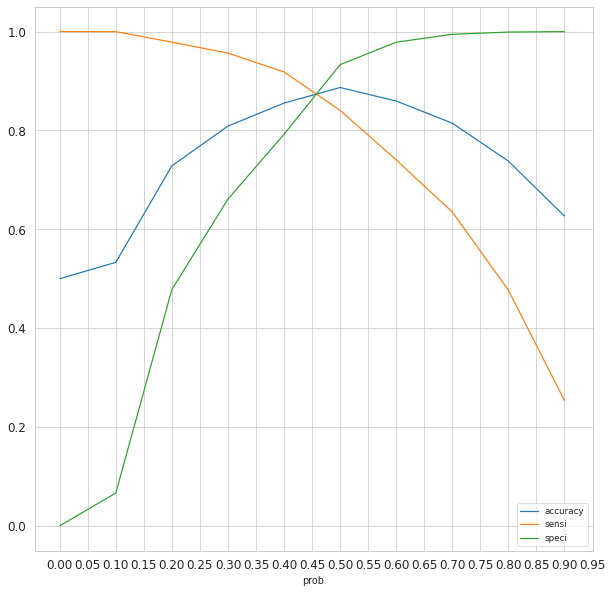

In [98]:
# plot to find out the right threshold
sns.set_style("whitegrid") 
sns.set_context("paper") 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,10))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12, )
plt.yticks(size = 12)
plt.show()


#### Choosing 0.5 as probability cutoff

In [99]:
# Creating new column 'final_predicted' with 1 if Converted_prob > 0.5 else 0
y_train_pred_final['final_predicted'] = y_train_pred_final.predicted_prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,actual_reviews,predicted_prob,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.388968,0,1,1,1,1,0,0,0,0,0,0,0
1,1,0.965007,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.955935,2,1,1,1,1,1,1,1,1,1,1,1
3,1,0.911340,3,1,1,1,1,1,1,1,1,1,1,1
4,1,0.904010,4,1,1,1,1,1,1,1,1,1,1,1


In [100]:
# confusion matrix for train data
confusion1 = confusion_matrix(y_train_pred_final.actual_reviews, y_train_pred_final.final_predicted)
confusion1

array([[17400,  1247],
       [ 2972, 15675]])

In [101]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [102]:
# Let's see the sensitivity
TP / float(TP+FN)

0.8406177937469834

In [103]:
# Let us calculate specificity
TN / float(TN+FP)

0.9331259720062208

In [104]:
# prediction on test data
xg_testpred_prob=xg_pickle_model.predict_proba(tv_test_reviews)[:,1]

In [106]:
# prediction probabilities
y_test_pred_final = pd.DataFrame({'actual_reviews':y_test, 'predicted_prob':xg_testpred_prob})
y_test_pred_final.head()

,actual_reviews,predicted_prob
6102,1,0.819170
2539,1,0.700634
21575,1,0.519773
19574,1,0.551777
12804,1,0.586170


In [107]:
# predictions with 0.5 cutoff probability
y_test_pred_final['final_predicted'] = y_test_pred_final.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,actual_reviews,predicted_prob,final_predicted
6102,1,0.819170,1
2539,1,0.700634,1
21575,1,0.519773,1
19574,1,0.551777,1
12804,1,0.586170,1


In [108]:
# confusion matrix for test data
confusion2 = confusion_matrix(y_test_pred_final.actual_reviews, y_test_pred_final.final_predicted )
confusion2

array([[ 826,  189],
       [1340, 6645]])

In [109]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [110]:
# Let's see the sensitivity of our test data
TP / float(TP+FN)

0.8321853475266124

In [111]:
# Let us calculate specificity of our test data
TN / float(TN+FP)

0.8137931034482758

In [112]:
# roc of test data
roc_auc_score(y_test, xg_pickle_model.predict_proba(tv_test_reviews)[:,1])

0.9059759216017719

## Recommendation Engine

In [113]:
# loading dataset
ratings = df.copy()
ratings.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive


In [114]:
# filtering columns for recommendation engine
ratings=ratings[['reviews_username','name','reviews_rating']]
ratings.head(6)

,reviews_username,name,reviews_rating
0,joshua,Pink Friday: Roman Reloaded Re-Up (w/dvd),5
1,dorothy w,Lundberg Organic Cinnamon Toast Rice Cakes,5
2,dorothy w,Lundberg Organic Cinnamon Toast Rice Cakes,5
3,rebecca,K-Y Love Sensuality Pleasure Gel,1
4,walker557,K-Y Love Sensuality Pleasure Gel,1
5,samantha,K-Y Love Sensuality Pleasure Gel,1


In [115]:
# giving user id and item id
ratings['user_id'] = ratings.groupby(ratings['reviews_username'].tolist(), sort=False).ngroup() + 1
ratings['item_id'] = ratings.groupby(ratings['name'].tolist(), sort=False).ngroup() + 1
ratings.shape

(30000, 5)

In [116]:
# checking for null values
ratings.isnull().sum()

reviews_username    63
name                 0
reviews_rating       0
user_id              0
item_id              0
dtype: int64

In [117]:
# dropping rows with null values and dropping duplicates
ratings=ratings.dropna()
ratings=ratings.drop_duplicates(subset=['reviews_username','name'])

In [118]:
# Test and Train split of the dataset.
train, test = train_test_split(ratings, test_size=0.30, random_state=31)

In [119]:
print(train.shape)
print(test.shape)

(19311, 5)
(8277, 5)


## User User Recommendation Engine

In [120]:
def user_user(train,test,pred,user_name=None):
  
  # Pivot the train ratings' dataset into matrix format in which columns are item id and the rows are user IDs.
  df_pivot = train.pivot(
      index='user_id',
      columns='item_id',
      values='reviews_rating').fillna(0)

  '''Creating dummy train & dummy test dataset
  These dataset will be used for prediction
  Dummy train will be used later for prediction of the items which has not been rated by the user.
  To ignore the items rated by the user, we will mark it as 0 during prediction.
  The items not rated by user is marked as 1 for prediction in dummy train dataset.
  Dummy test will be used for evaluation. To evaluate, we will only make prediction on the itemss rated by the user.
  So, this is marked as 1. This is just opposite of dummy_train.'''

  # Copy the train dataset into dummy_train
  dummy_train = train.copy()

  # The items not rated by user is marked as 1 for prediction. 
  dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

  # Convert the dummy train dataset into matrix format.
  dummy_train = dummy_train.pivot(
      index='user_id',
      columns='item_id',
      values='reviews_rating').fillna(1)
  
  # Using adjusted Cosine
  # Create a user-item matrix.
  df_pivot = train.pivot_table(
      index='user_id',
      columns='item_id',
      values='reviews_rating')

  # Normalising the rating of the item for each user around 0 mean
  mean = np.nanmean(df_pivot, axis=1)
  df_subtracted = (df_pivot.T-mean).T

  # Creating the User Similarity Matrix using pairwise_distance function.
  user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
  user_correlation[np.isnan(user_correlation)] = 0

  if pred==True:
    # Prediction
    '''Doing the prediction for the users which are positively related with other users,
    and not the users which are negatively related as we are interested in the users which are more similar to the current users.
    So, ignoring the correlation for values less than 0.'''
    user_correlation[user_correlation<0]=0
    
    '''Rating predicted by the user (for items rated as well as not rated) is the weighted sum of
    correlation with the item rating (as present in the rating dataset).'''
    user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))

    # Since we are interested only in the items not rated by the user, we will ignore the items rated by the user by making it zero.
    user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
    # Saving the model
    filepath = "/content/drive/MyDrive/Colab Notebooks/reco_best.pkl"
    with gzip.open(filepath, "wb") as f:
      pickled = pickle.dumps(user_final_rating)
      optimized_pickle = pickletools.optimize(pickled)
      f.write(optimized_pickle)

    user_input=ratings.loc[ratings['reviews_username']==user_name]['user_id'].reset_index(drop=True)[0]
    d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
    d = pd.merge(d,ratings[['item_id','name']],left_on='item_id',right_on='item_id', how = 'left')
    d.drop_duplicates(inplace=True)
    return d

  else:
    # Evaluation
    # Find out the common users of test and train dataset.
    common = test[test.user_id.isin(train.user_id)]

    # convert into the user-item matrix.
    common_user_based_matrix = common.pivot_table(index='user_id', columns='item_id', values='reviews_rating')

    # Convert the user_correlation matrix into dataframe.
    user_correlation_df = pd.DataFrame(user_correlation)
    user_correlation_df['user_id'] = df_subtracted.index
    user_correlation_df.set_index('user_id',inplace=True)
    
    list_name = common.user_id.tolist()
    user_correlation_df.columns = df_subtracted.index.tolist()
    user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

    user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]
    user_correlation_df_3 = user_correlation_df_2.T
    user_correlation_df_3[user_correlation_df_3<0]=0
    common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))

    dummy_test = common.copy()
    dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
    dummy_test = dummy_test.pivot_table(index='user_id', columns='item_id', values='reviews_rating').fillna(0)
    common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

    #RMSE
    X  = common_user_predicted_ratings.copy() 
    X = X[X>0]
    with warnings.catch_warnings():
      warnings.simplefilter("ignore", category=RuntimeWarning)
      scaler = MinMaxScaler(feature_range=(1, 5))
      print(scaler.fit(X))
    y = (scaler.transform(X))

    common_ = common.pivot_table(index='user_id', columns='item_id', values='reviews_rating')
    # Finding total non-NaN value
    total_non_nan = np.count_nonzero(~np.isnan(y))
    rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
    return rmse



In [121]:
# getting top 20 recommendation
top20= user_user(train=train,test=test,pred=True,user_name='joshua')
top20

,item_id,1,name
0,80,6.560933,The Resident Evil Collection 5 Discs (blu-Ray)
821,43,5.550296,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
1471,229,3.597163,Godzilla 3d Includes Digital Copy Ultraviolet ...
4619,250,3.136995,Planes: Fire Rescue (2 Discs) (includes Digita...
5716,138,2.665009,Head & Shoulders Dandruff Shampoo Ocean Lift 2...
5722,96,2.425008,Chester's Cheese Flavored Puffcorn Snacks
5895,89,1.884446,"Hormel Chili, No Beans"
6089,223,0.690093,Alex Cross (dvdvideo)
6229,61,0.615457,Arrid Extra Dry Anti-Perspirant Deodorant Spra...
6247,162,0.615457,Pleasant Hearth Diamond Fireplace Screen - Esp...


In [122]:
#getting rmse of user-user
rmse= user_user(train=train,test=test,pred=False,user_name=None)
rmse

MinMaxScaler(copy=True, feature_range=(1, 5))


2.542261859029648

## Item Item Recommendation Engine

In [123]:
def item_item(train,test,pred,user_name=None):
  # Pivot the train ratings' dataset into matrix format in which columns are item id and the rows are user IDs.
  df_pivot = train.pivot(
      index='user_id',
      columns='item_id',
      values='reviews_rating').fillna(0)

  '''Creating dummy train & dummy test dataset
  These dataset will be used for prediction
  Dummy train will be used later for prediction of the items which has not been rated by the user.
  To ignore the items rated by the user, we will mark it as 0 during prediction.
  The items not rated by user is marked as 1 for prediction in dummy train dataset.
  Dummy test will be used for evaluation. To evaluate, we will only make prediction on the items rated by the user.
  So, this is marked as 1. This is just opposite of dummy_train.'''

  # Copy the train dataset into dummy_train
  dummy_train = train.copy()

  # The items not rated by user is marked as 1 for prediction. 
  dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

  # Convert the dummy train dataset into matrix format.
  dummy_train = dummy_train.pivot(
      index='user_id',
      columns='item_id',
      values='reviews_rating').fillna(1)
  
  # Using adjusted Cosine
  '''Taking the transpose of the rating matrix to normalize the rating around the mean for different item ID. In the user based similarity, we    had taken mean for each user instead of each item.'''
  df_pivot = train.pivot(
      index='user_id',
      columns='item_id',
      values='reviews_rating').T

  # Normalising the rating for each item for using the Adujsted Cosine
  mean = np.nanmean(df_pivot, axis=1)
  df_subtracted = (df_pivot.T-mean).T

  # Finding the cosine similarity using pairwise distances approach
  item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
  item_correlation[np.isnan(item_correlation)] = 0

  if pred==True:
    # Prediction
    # Filtering the correlation only for which the value is greater than 0. (Positively correlated)
    item_correlation[item_correlation<0]=0
  
    item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)

    # Filtering the rating only for the items not rated by the user for recommendation
    item_final_rating = np.multiply(item_predicted_ratings,dummy_train)

    # Finding the top 20 recommendation for the user
    user_input=ratings.loc[ratings['reviews_username']==user_name]['user_id'].reset_index(drop=True)[0]
    d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
    d = pd.merge(d,ratings[['item_id','name']],left_on='item_id',right_on='item_id',how = 'left')
    d.drop_duplicates(inplace=True)
    return d

  else:
    # Evaluation
    # Find out the common users of test and train dataset.
    common =  test[test.item_id.isin(train.item_id)]

    # convert into the user-item matrix.
    common_item_based_matrix = common.pivot_table(index='user_id', columns='item_id', values='reviews_rating').T

    # Convert the user_correlation matrix into dataframe.
    item_correlation_df = pd.DataFrame(item_correlation)
    item_correlation_df['item_id'] = df_subtracted.index
    item_correlation_df.set_index('item_id',inplace=True)

    list_name = common.item_id.tolist()
    item_correlation_df.columns = df_subtracted.index.tolist()
    item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]
    item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]
    item_correlation_df_3 = item_correlation_df_2.T
    item_correlation_df_3[item_correlation_df_3<0]=0
    common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))

    dummy_test = common.copy()
    dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
    dummy_test = dummy_test.pivot_table(index='user_id', columns='item_id', values='reviews_rating').T.fillna(0)
    common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

    #RMSE
    X  = common_item_predicted_ratings.copy() 
    X = X[X>0]
    with warnings.catch_warnings():
      warnings.simplefilter("ignore", category=RuntimeWarning)
      scaler = MinMaxScaler(feature_range=(1, 5))
      print(scaler.fit(X))
    y = (scaler.transform(X))

    common_ = common.pivot_table(index='user_id', columns='item_id', values='reviews_rating').T
    # Finding total non-NaN value
    total_non_nan = np.count_nonzero(~np.isnan(y))
    rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
    return rmse


In [124]:
#top20 recommendation based on item-item
top20= item_item(train=train,test=test,pred=True,user_name='joshua')
top20

,item_id,1,name
0,241,0.054340,Boraam Sonoma Kitchen Cart With Wire Brush Gra...
23,83,0.052603,Nearly Natural 5.5' Bamboo W/decorative Planter
27,43,0.041753,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
677,32,0.039012,Bi-O-kleen Spray & Wipe All Purpose Cleaner
685,84,0.026133,100:Complete First Season (blu-Ray)
820,250,0.018336,Planes: Fire Rescue (2 Discs) (includes Digita...
1917,58,0.017292,Tresemme Kertatin Smooth Infusing Conditioning
1974,119,0.016052,Mill Creek Aloe Vera & Paba Lotion
1984,205,0.015971,Nexxus Exxtra Gel Style Creation Sculptor
2443,67,0.013306,Ragu Roasted Garlic Parmesan Pasta Sauce


In [125]:
# rmse of item-item based recommendation
rmse= item_item(train=train,test=test,pred=False,user_name=None)
rmse

MinMaxScaler(copy=True, feature_range=(1, 5))


3.5668224036461007

## User-User has better rmse than Item-Item. So we shall use user-user based recommendation system
## Top 5 recommendation

In [127]:
# loading the user-user model
with gzip.open('/content/drive/MyDrive/Colab Notebooks/reco_best.pkl', 'rb') as f:
    p = pickle.Unpickler(f)
    reco_pickle_model = p.load()

In [128]:
reco_pickle_model.head()

item_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,41,42,...,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,253,254,255,257,258,259,260,261,262,263,264,265,266,267,268,270,271
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.615457,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.168550,0.0,0.0,0.0,0.000000,0.0,...,3.597163,0.0,0.000000,0.0,0.000000,0.533002,0.0,0.000000,0.0,0.0,0.000000,0.0,0.101130,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.533002,3.136995,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.101305,1.424082,0.0,0.0,0.0,0.0,0.308607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3.177445,0.0,0.436436,0.0,8.050022,0.0,0.0,0.0,0.206197,0.0,...,16.673029,0.0,0.566947,0.0,0.000000,0.922720,0.0,0.572019,0.0,0.0,1.414388,0.0,3.740752,3.950623,0.0,0.460763,0.0,0.0,0.0,0.206197,0.254567,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.099618,0.0,0.0,0.0,0.0,0.308607,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,2.834734,0.372678,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.340844,0.0,0.0,2.802243,0.0,0.790569,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,15.719079,0.0,0.000000,0.0,0.454459,2.389575,0.0,0.000000,0.0,0.0,0.000000,0.0,3.773375,3.064234,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,7.339867,0.0,0.0,0.0,0.0,0.0,0.0,1.020621,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,2.0


In [129]:
# top20
user_input=5
d = reco_pickle_model.loc[user_input].sort_values(ascending=False)[0:20]
d = pd.merge(d,ratings[['item_id','name']],left_on='item_id',right_on='item_id', how = 'left')
d.drop_duplicates(inplace=True)

In [130]:
#merging with main dataframe
d1 = pd.merge(d,df,left_on=['name'],right_on=['name'],how = 'inner')

In [131]:
d1.head()

,item_id,5,name,id,brand,categories,manufacturer,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,229,15.719079,Godzilla 3d Includes Digital Copy Ultraviolet ...,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,2015-08-05T00:00:00.000Z,NaN,False,1,could have left this one on the shelf but it h...,awful,NaN,NaN,primoconcept,Positive
1,229,15.719079,Godzilla 3d Includes Digital Copy Ultraviolet ...,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,2015-07-13T00:00:00.000Z,NaN,False,1,This movie is much worse that expected. The 19...,Much worse than expected,NaN,NaN,terrym,Positive
2,229,15.719079,Godzilla 3d Includes Digital Copy Ultraviolet ...,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,2016-01-29T00:00:00.000Z,NaN,False,1,Just don't get the hype about Godzilla. Frankl...,Just dont get the hype,NaN,NaN,mrme,Negative
3,229,15.719079,Godzilla 3d Includes Digital Copy Ultraviolet ...,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,2016-07-07T00:00:00.000Z,NaN,False,1,A little disappointed its not like the Godzill...,Not the best item,NaN,NaN,3dknights,Negative
4,229,15.719079,Godzilla 3d Includes Digital Copy Ultraviolet ...,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,2016-12-02T00:00:00.000Z,NaN,True,1,"It was on sale, so I bought it. After I got it...","Good movie, bad packaging.",NaN,NaN,master,Negative


In [132]:
# cleaning the data
d1_clean= clean(d1, keep_name=True)

In [133]:
# dropping duplicates
d1_clean.drop_duplicates(inplace=True)

In [134]:
d1_clean.shape

(20167, 3)

In [135]:
# applying tfidf
tv_reviews=tfidf_model.transform(d1_clean['reviews_text_title'].to_list())
print('Tfidf:',tv_reviews.shape)

Tfidf: (20167, 3572)


In [136]:
# prediction using XGBoost
d1_clean['final_pred']=xg_pickle_model.predict(tv_reviews)

In [137]:
# getting number of predicted positives and total count of reviews of each item
final_df=d1_clean[['name','final_pred']].groupby(by='name').agg(['sum','count'])

In [138]:
final_df

final_pred      
                                                          sum count
name                                                               
Boraam Sonoma Kitchen Cart With Wire Brush Gray...         19    23
Burt's Bees Lip Shimmer, Raisin                           607   873
Chester's Cheese Flavored Puffcorn Snacks                 109   177
Clorox Disinfecting Bathroom Cleaner                     1611  1908
Clorox Disinfecting Wipes Value Pack Scented 15...       6383  7841
Godzilla 3d Includes Digital Copy Ultraviolet 3...       2552  3322
Hoover174 Platinum Collection153 Lightweight Ba...        285   347
Hormel Chili, No Beans                                    118   196
Jason Aldean - They Don't Know                            143   204
L'or233al Paris Elvive Extraordinary Clay Rebal...        726   790
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Dig...        586   667
Olay Regenerist Deep Hydration Regenerating Cream         469   627
Planes: Fire Rescue (2 Discs) (includes Digital...        971  1138
Red (special Edition) (dvdvideo)                          558   671
Soothing Touch Lemon Cardamom Vegan Lip Balm .2...          3     6
Stargate (ws) (ultimate Edition) (director's Cu...        155   186
The Honest Company Laundry Detergent                       15    19
The Resident Evil Collection 5 Discs (blu-Ray)            565   844
Tostitos Bite Size Tortilla Chips                         156   263
Yes To Carrots Nourishing Body Wash                        58    65

In [139]:
# getting %of positive predicted reviews
final_df['%']=final_df['final_pred']['sum']/final_df['final_pred']['count']

In [140]:
# sorting based on highest %
final_df=final_df.sort_values(by='%',ascending=False)

In [141]:
# top 5 recommendation
final_df.index[:5]

Index(['L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz',
       'Yes To Carrots Nourishing Body Wash',
       'My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)',
       'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
       'Clorox Disinfecting Bathroom Cleaner'],
      dtype='object', name='name')